# European Social Survey 2012 and 2014

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
4. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
5. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [87]:
df = pd.read_csv('ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [88]:
# Check what countries are in the dataframe
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [89]:
# Year 6 is 2012, Year 7 is 2014
df.year.unique()

array([6, 7])

### 1. Did people become less trusting from 2012 to 2014.  Compute results for each country in the sample.

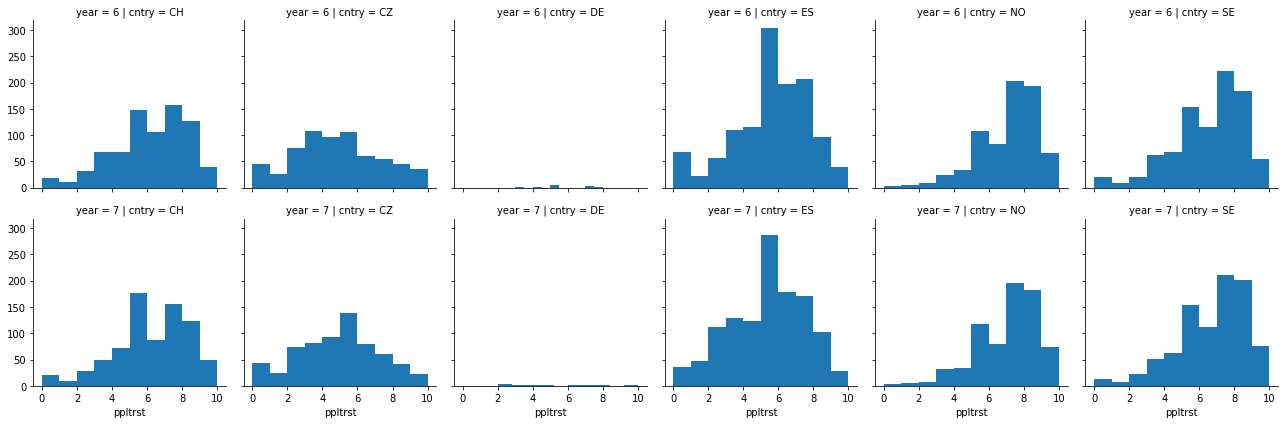

In [90]:
g = sns.FacetGrid(df, col='cntry', row='year')
g = g.map(plt.hist, 'ppltrst')

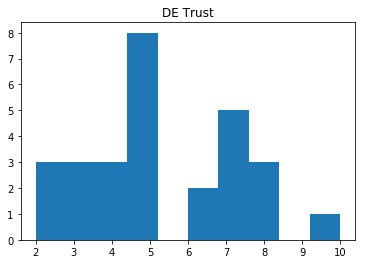

In [91]:
plt.hist(df[df['cntry']=='DE']['ppltrst'])
plt.title('DE Trust')
plt.show()

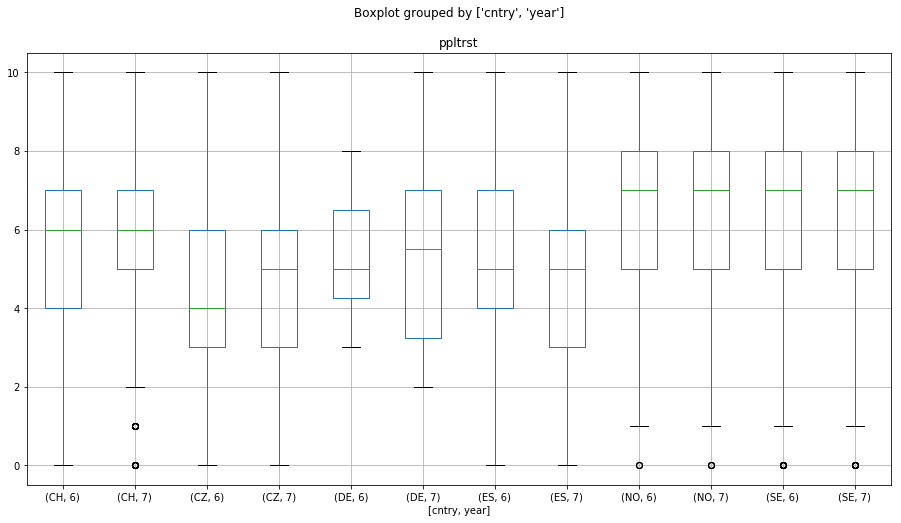

In [92]:
df.boxplot(column='ppltrst', by=['cntry', 'year'], figsize=(15, 8))
plt.show()

In [93]:
df['ppltrst'].isna().sum()

14

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [95]:
df.dropna(axis=0, subset=['ppltrst'], inplace=True)

id_nums6 = df[df['year']==6]['idno']
id_nums7 = df[df['year']==7]['idno']

id_nums = df[(df['idno'].isin(id_nums6)) & (df['idno'].isin(id_nums7))]['idno'].unique()

In [96]:
countries = list(df.cntry.unique())

# Use the relational ttest because the people are the same people from year to year
for country in countries:
    # People sometimes move, need to do the id number check by country
    id_nums6 = df[(df['year']==6) & (df['cntry']==country)]['idno']
    id_nums7 = df[(df['year']==7) & (df['cntry']==country)]['idno']
    
    data_2012 = df[(df['cntry']==country) & (df['year']==6) & (df['idno'].isin(id_nums7))]['ppltrst']
    data_2014 = df[(df['cntry']==country) & (df['year']==7) & (df['idno'].isin(id_nums6))]['ppltrst']
    print(len(data_2012), len(data_2014))
    print('{} ttest {}'.format(country, stats.ttest_rel(data_2012, data_2014)))

773 773
CH ttest Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)
650 650
CZ ttest Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.6171292682404208)
14 14
DE ttest Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)
1211 1211
ES ttest Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725321856)
729 729
NO ttest Ttest_relResult(statistic=0.5073077081124404, pvalue=0.6120925701518767)
906 906
SE ttest Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.0390078167095776)


In [97]:
country='SE'
print(np.mean(df[(df['cntry']==country) & (df['year']==6)]['ppltrst']))
print(np.mean(df[(df['cntry']==country) & (df['year']==7)]['ppltrst']))


6.058498896247241
6.257709251101321


In [98]:
country='ES'
print(np.mean(df[(df['cntry']==country) & (df['year']==6)]['ppltrst']))
print(np.mean(df[(df['cntry']==country) & (df['year']==7)]['ppltrst']))

5.114591920857379
4.895127993393889


Sweden and Spain had p-values less than 0.05 for the difference in means of people trust from 2012 to 2014.  This means we can reject the null hypothesis that the amount of trust from 2012 to 2014 did not change and that there was a change in people trust for those countries. 

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

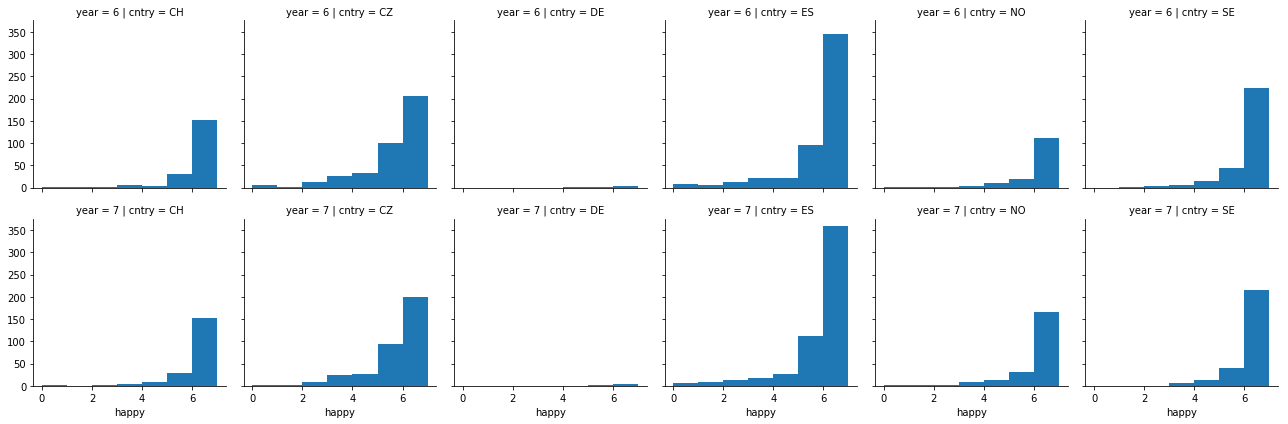

In [132]:
g = sns.FacetGrid(df, col='cntry', row='year')
g = g.map(plt.hist, 'happy', bins=range(0,8))

These do not appear to be normally distributed.  They are all skewed.

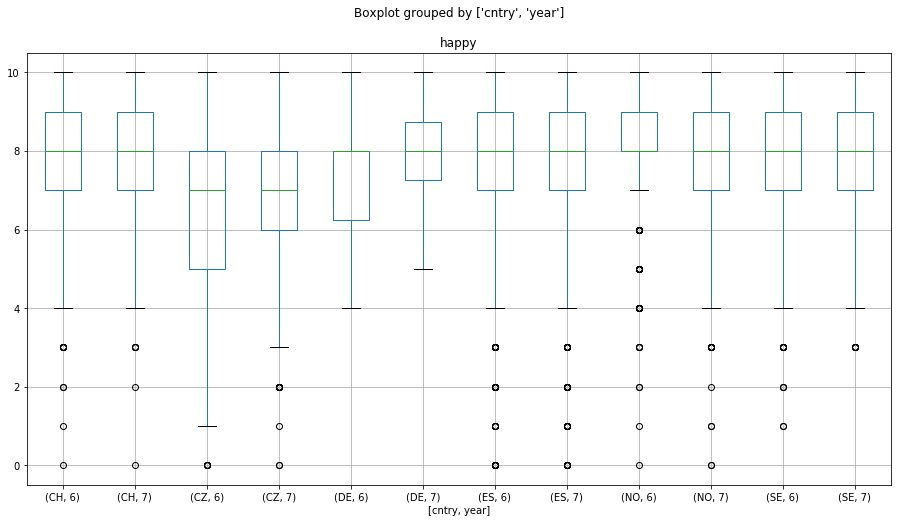

In [100]:
df.boxplot(column='happy', by=['cntry', 'year'], figsize=(15, 8))
plt.show()

In [101]:
# Kruskal-Wallace Test

df['ranks'] = stats.rankdata(df['happy'])

In [102]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,ranks
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,4414.5
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,6551.5
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,2384.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,7984.5
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,4414.5


In [103]:
print('Mean happiness rank per country, 2012 and 2014')
for country in countries:
    print('{}: {:.2f}, {:.2f}'.format(country, 
                                      np.mean(df[(df['cntry']==country) & (df['year']==6)]['ranks']),
                                      np.mean(df[(df['cntry']==country) & (df['year']==7)]['ranks'])
                                      ))
    

for country in countries:
    print(country, stats.kruskal(df[(df['cntry']==country) & (df['year']==6)]['ranks'],
                                 df[(df['cntry']==country) & (df['year']==7)]['ranks']))


Mean happiness rank per country, 2012 and 2014
CH: 4814.49, 4848.29
CZ: 3197.33, 3277.08
DE: 3830.14, 4351.46
ES: 4104.09, 3890.77
NO: 5115.39, 4570.85
SE: 4521.02, 4556.31
CH KruskalResult(statistic=0.11199672775584622, pvalue=0.7378822411273755)
CZ KruskalResult(statistic=1.0149464696148913, pvalue=0.313720727301365)
DE KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)
ES KruskalResult(statistic=4.053294088692648, pvalue=0.04408524044657923)
NO KruskalResult(statistic=20.44952878293651, pvalue=6.1224628294746315e-06)
SE KruskalResult(statistic=0.08485405639051136, pvalue=0.7708240317867395)


Spain is the only one with a statistically significant change.

### 3. Who reported watching more TV in 2012, men or women?

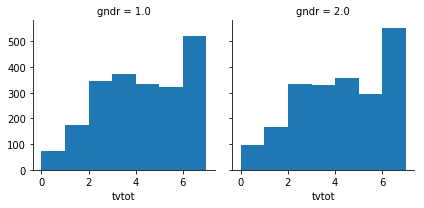

In [104]:
g = sns.FacetGrid(df[df['year']==6], col='gndr')
g = g.map(plt.hist, 'tvtot', bins=range(0,8))

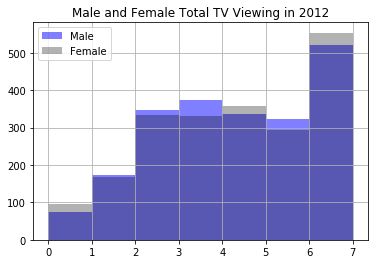

In [105]:
df[(df['gndr']==1) & (df['year']==6)]['tvtot'].hist(bins=range(0,8), color='b', alpha=0.5, label='Male')
df[(df['gndr']==2) & (df['year']==6)]['tvtot'].hist(bins=range(0,8), color='k', alpha=0.3, label='Female')
plt.title('Male and Female Total TV Viewing in 2012')
plt.legend()
plt.show()

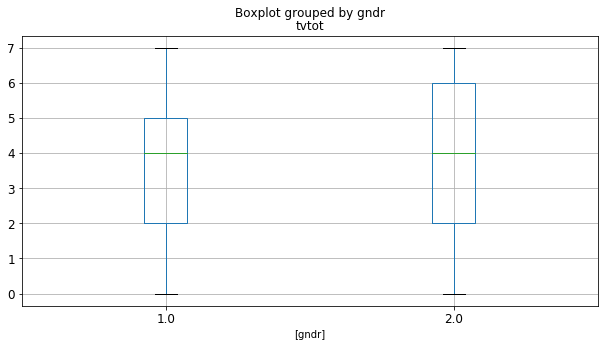

In [106]:
df[df['year']==6].boxplot(column=['tvtot'], by=['gndr'], fontsize=12, figsize=(10, 5))
plt.show()

In [119]:
df_2012 = df.drop(df[df['year']==7].index, axis=0)

df_2012['ranks_tv'] = stats.rankdata(df_2012['tvtot'])

print('Mean TV time rank for each gender, Male and Female')

print('Male {:.2f}, Female {:.2f}'.format(np.mean(df_2012[df_2012['gndr']==1]['ranks_tv']),
                                          np.mean(df_2012[df_2012['gndr']==2]['ranks_tv'])))
                                
print(stats.kruskal(df_2012[df_2012['gndr']==1]['ranks_tv'],
                    df_2012[df_2012['gndr']==2]['ranks_tv']))

Mean TV time rank for each gender, Male and Female
Male 2130.92, Female 2157.19
KruskalResult(statistic=0.49315237750793345, pvalue=0.4825244608957573)


According to this test, there is not a statistical difference between male and female viewing time.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone? 

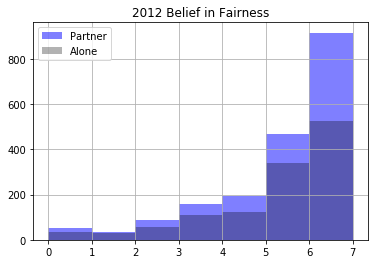

In [122]:
df_2012[df_2012['partner']==1]['pplfair'].hist(bins=range(0,8), color='b', alpha=0.5, label='Partner')
df_2012[df_2012['partner']==2]['pplfair'].hist(bins=range(0,8), color='k', alpha=0.3, label='Alone')
plt.title('2012 Belief in Fairness')
plt.legend()
plt.show()

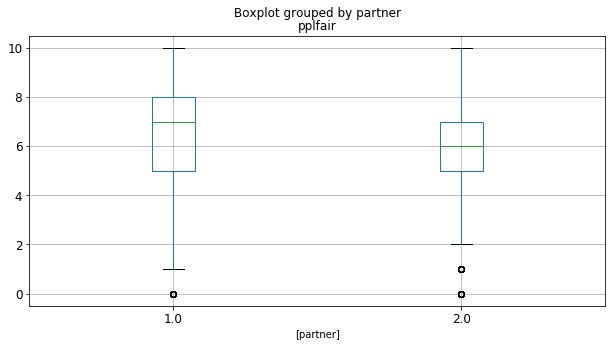

In [123]:
df_2012.boxplot(column=['pplfair'], by=['partner'], fontsize=12, figsize=(10, 5))
plt.show()

In [124]:
df_2012['ranks_pplfair'] = stats.rankdata(df_2012['pplfair'])

print('Mean Fairness Rank by Partner and Alone')

print('Partner {:.2f}, Alone {:.2f}'.format(np.mean(df_2012[df_2012['partner']==1]['ranks_pplfair']),
                                            np.mean(df_2012[df_2012['partner']==2]['ranks_pplfair'])))
                                
print(stats.kruskal(df_2012[df_2012['partner']==1]['ranks_pplfair'],
                    df_2012[df_2012['partner']==2]['ranks_pplfair']))

Mean Fairness Rank by Partner and Alone
Partner 2196.37, Alone 2054.00
KruskalResult(statistic=13.650470611185938, pvalue=0.00022018612652338618)


According to this test, the pvalue is less than 0.05 and so we conclude that the difference in mean between the perception of fairness of people is different for people who live with a partner and people who live alone.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [125]:
df_2014 = df.drop(df[df['year']==6].index, axis=0)

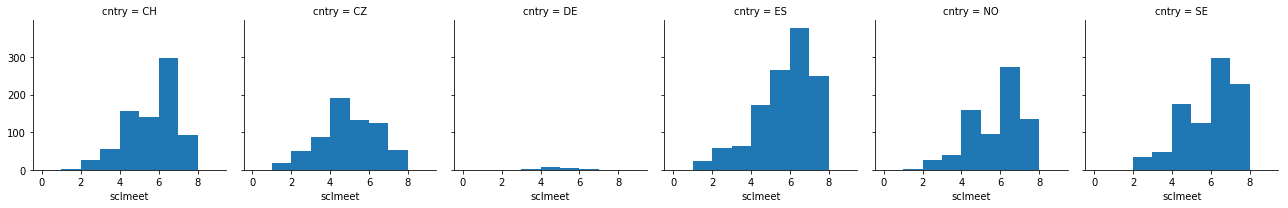

In [146]:
g = sns.FacetGrid(df_2014, col='cntry')
g = g.map(plt.hist, 'sclmeet', bins=range(0,10))

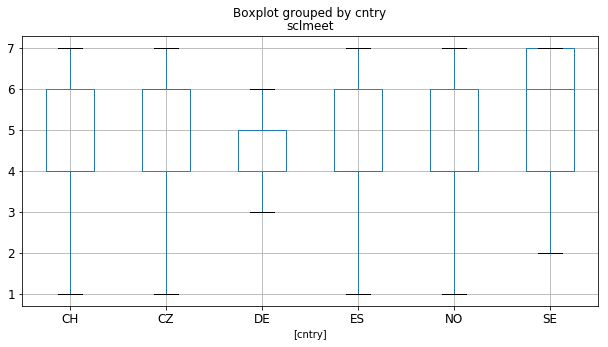

In [135]:
df_2014.boxplot(column=['sclmeet'], by=['cntry'], fontsize=12, figsize=(10, 5))
plt.show()

In [144]:
# ANOVA
# Make sure not to include any NAs
F, p = stats.f_oneway(
    df_2014[(df_2014['cntry']=='CH') & (df_2014['sclmeet'].isna()==False)]['sclmeet'],
    df_2014[(df_2014['cntry']=='CZ') & (df_2014['sclmeet'].isna()==False)]['sclmeet'],
    df_2014[(df_2014['cntry']=='ES') & (df_2014['sclmeet'].isna()==False)]['sclmeet'])

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

74.30275556959556
4.0625765931664165e-32


In [145]:
df_ch = df_2014[(df_2014['cntry']=='CH') & (df_2014['sclmeet'].isna()==False)]['sclmeet']
df_cz = df_2014[(df_2014['cntry']=='CZ') & (df_2014['sclmeet'].isna()==False)]['sclmeet']
df_es = df_2014[(df_2014['cntry']=='ES') & (df_2014['sclmeet'].isna()==False)]['sclmeet']

print(stats.ttest_ind(df_ch, df_cz))
print(stats.ttest_ind(df_ch, df_es))
print(stats.ttest_ind(df_cz, df_es))

Ttest_indResult(statistic=9.732826183408694, pvalue=1.0198069286313635e-21)
Ttest_indResult(statistic=-1.5021437248045657, pvalue=0.13321953335113418)
Ttest_indResult(statistic=-11.422115905553795, pvalue=2.9816866004935833e-29)


Switzerland and Czech Republic are different.  Czech Republic and Spain are also different.  Span and Switzerland are not.  Czech Republic mean is lower than that of Switzerland and Spain.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

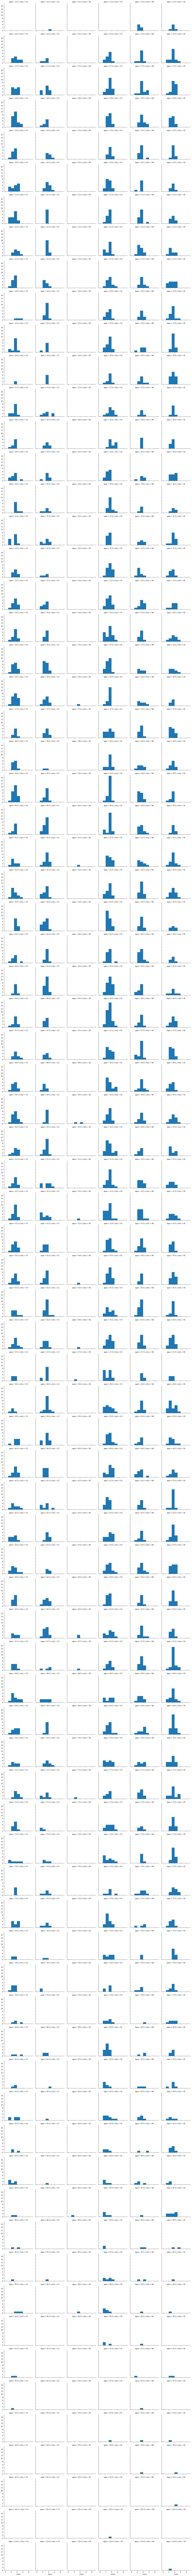

In [147]:
g = sns.FacetGrid(df_2014, col='cntry', row='agea')
g = g.map(plt.hist, 'sclact', bins=range(0,10))

In [152]:
# Age groups divided by decades
df_2014['age_group'] = df['agea'].apply(lambda x: x // 10)

df_2014.head()    

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,ranks,age_group
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0,6551.5,6.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0,1317.5,3.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0,4414.5,4.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0,6551.5,5.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0,4414.5,3.0


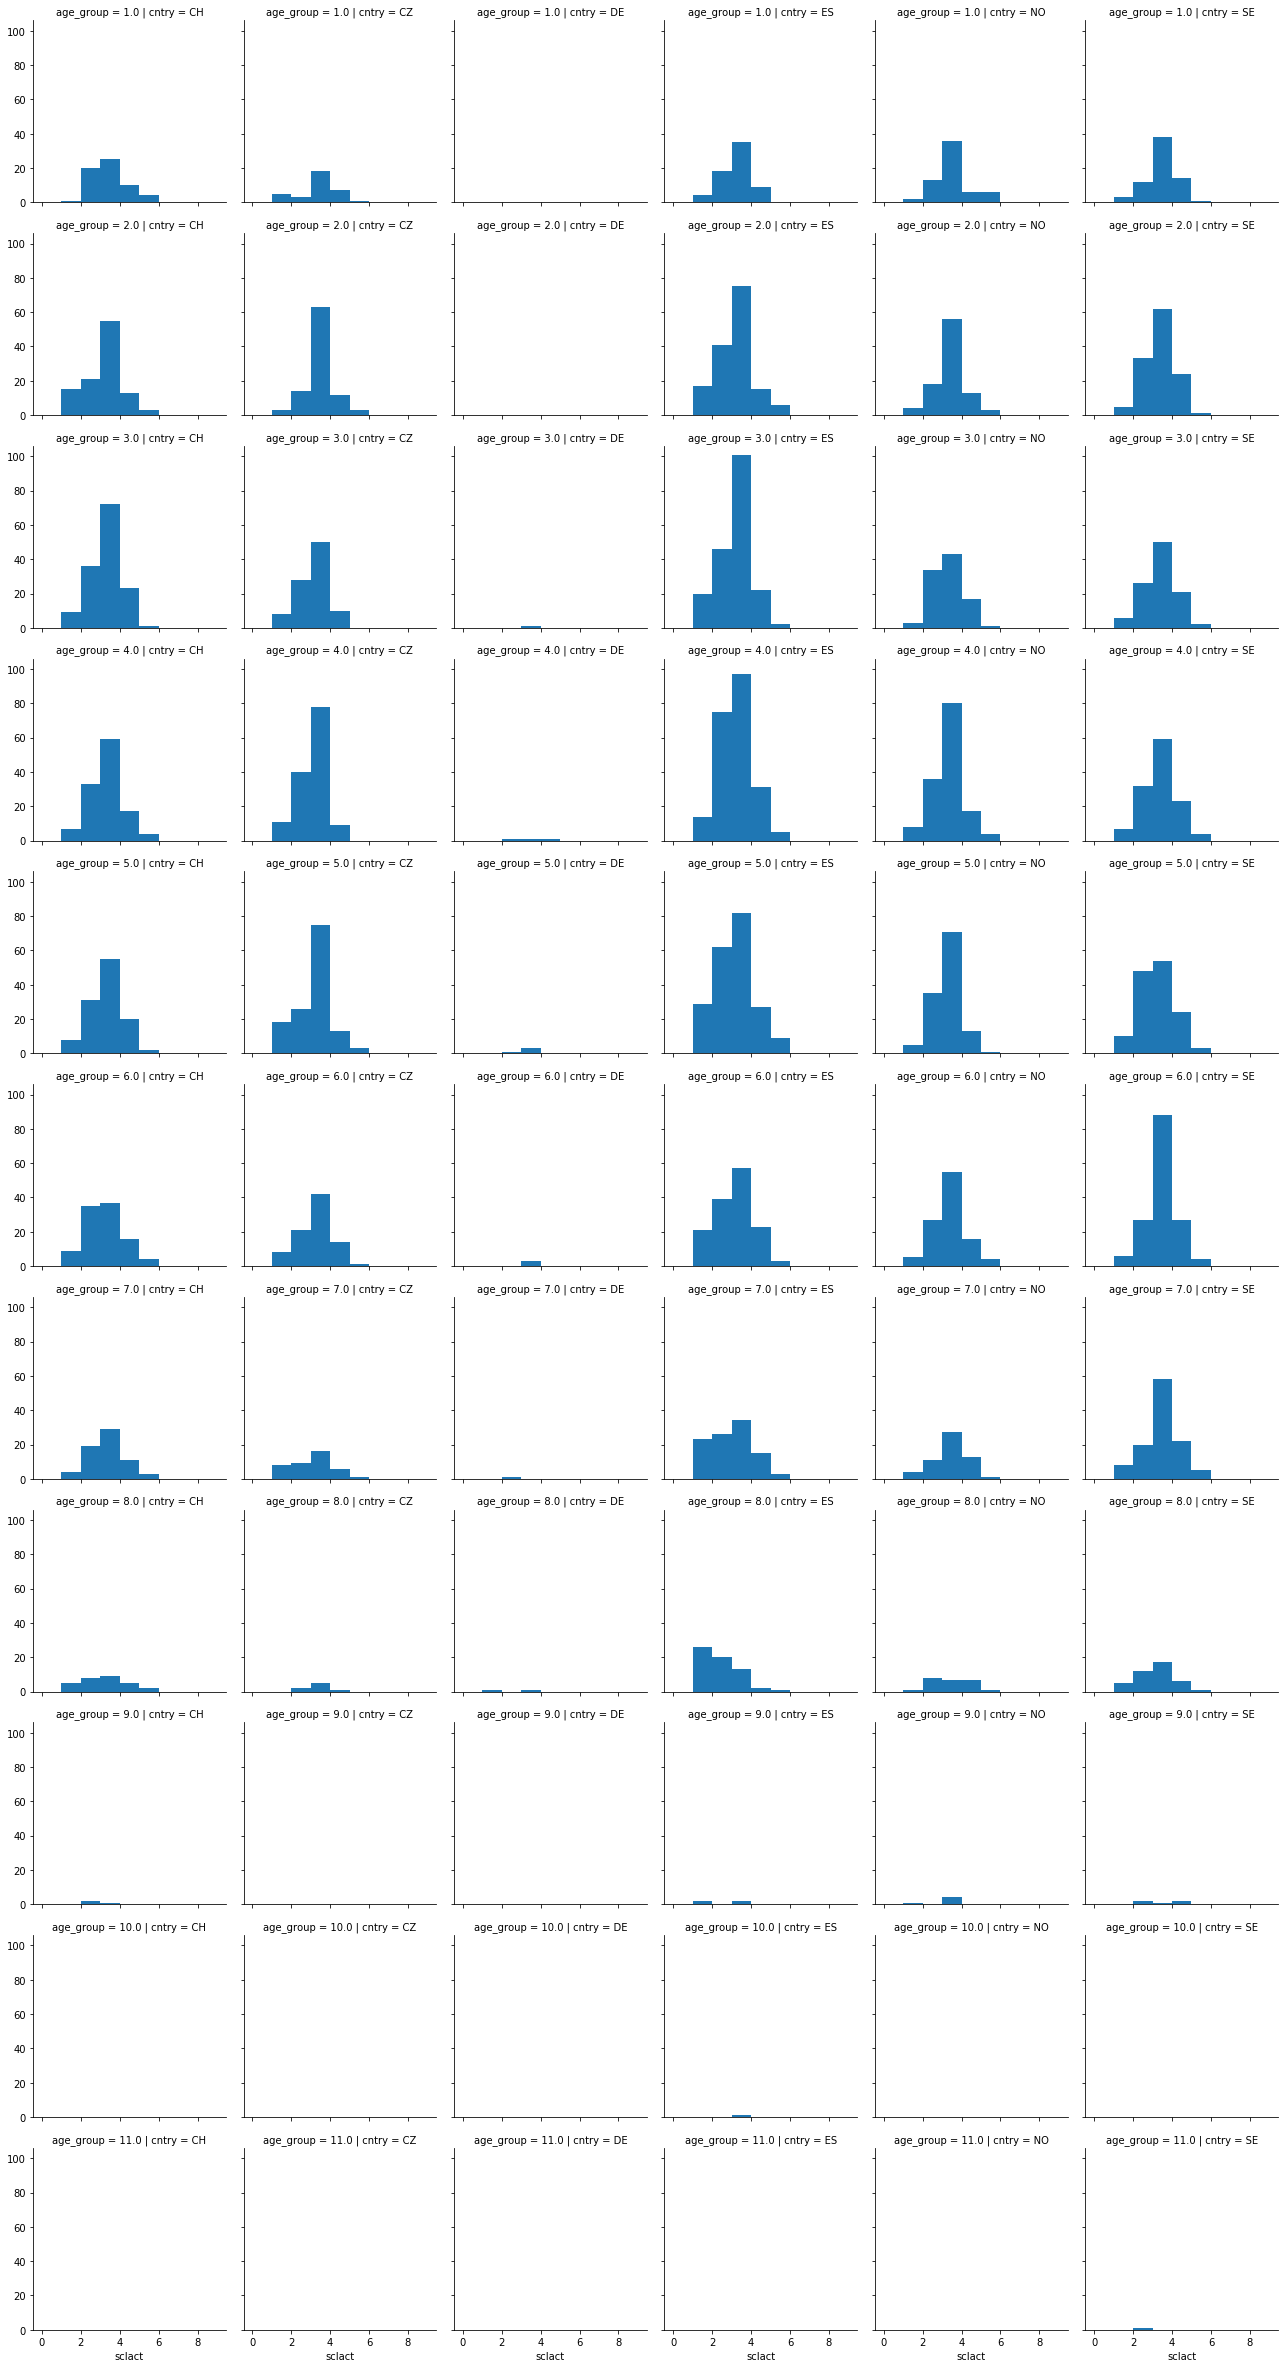

In [153]:
g = sns.FacetGrid(df_2014, col='cntry', row='age_group')
g = g.map(plt.hist, 'sclact', bins=range(0,10))

In [161]:
for age in range(1, 9):
    # ANOVA
    # Make sure not to include any NAs
    F, p = stats.f_oneway(
        df_2014[(df_2014['cntry']=='CH') & 
                (df_2014['sclact'].isna()==False) & 
                (df_2014['age_group']==age)]['sclact'],
        df_2014[(df_2014['cntry']=='CZ') & 
                (df_2014['sclact'].isna()==False) & 
                (df_2014['age_group']==age)]['sclact'],
        df_2014[(df_2014['cntry']=='ES') & 
                (df_2014['sclact'].isna()==False) & 
                (df_2014['age_group']==age)]['sclact'])

    # The F statistic.
    print('{}: {}, {}'.format(age, F, p))

1: 0.7791733666633031, 0.46055093743269093
2: 3.5913092334029026, 0.028573928239544716
3: 1.1108150680569382, 0.3302445532783898
4: 1.895807103033147, 0.151327029368417
5: 1.0877509720145961, 0.3378443151773217
6: 0.45642290153772846, 0.6339488444692851
7: 2.370466552629877, 0.09600631185848404
8: 7.980432795893643, 0.0006220700744880151


There appears to be a difference for the means for people in their 20s and in their 80s.

In [169]:
for age in [2, 8]:

    d_ch = df_2014[(df_2014['cntry']=='CH') & 
                   (df_2014['sclact'].isna()==False) & 
                   (df_2014['age_group']==age)]['sclact']
    d_cz = df_2014[(df_2014['cntry']=='CZ') & 
                   (df_2014['sclact'].isna()==False) &
                   (df_2014['age_group']==age)]['sclact']
    d_es = df_2014[(df_2014['cntry']=='ES') & 
                   (df_2014['sclact'].isna()==False) &
                   (df_2014['age_group']==age)]['sclact']

    ttest_1 = stats.ttest_ind(d_ch, d_cz)
    ttest_2 = stats.ttest_ind(d_ch, d_es)
    ttest_3 = stats.ttest_ind(d_cz, d_es)
    print('Age Range {}'.format(age*10))
    print('ch mean {:.2f}, cz mean {:.2f}, es mean {:.2f}'.format(np.mean(d_ch), np.mean(d_cz), np.mean(d_es)))
    print('ch-cz: {}\n ch-es: {}\n cz-es: {}'.format(ttest_1, ttest_2, ttest_3))

Age Range 20
ch mean 2.70, cz mean 2.98, es mean 2.69
ch-cz: Ttest_indResult(statistic=-2.305182613042413, pvalue=0.022182239990920467)
 ch-es: Ttest_indResult(statistic=0.10655622540406642, pvalue=0.9152235346839621)
 cz-es: Ttest_indResult(statistic=2.5882014844898196, pvalue=0.010219534332521317)
Age Range 80
ch mean 2.69, cz mean 2.88, es mean 1.90
ch-cz: Ttest_indResult(statistic=-0.42838315095488866, pvalue=0.6709970760939473)
 ch-es: Ttest_indResult(statistic=3.4082391058778314, pvalue=0.0009839042527689651)
 cz-es: Ttest_indResult(statistic=2.793819770028173, pvalue=0.006760993467602119)


In their 20s, the Czech Republic stands out as having more social interactions than Switzerland or Spain.  In their 90s, Spain stands out as having the least number of social interactions.  The pvalue for each of these is less than 0.05.